In [1]:
import numpy       as np
import pandas      as pd
import scipy.stats as stats

## Analysis of variance (ANOVA)

ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means. 

#Example-1
#Load the fair_pay_data and check 

#1. Is there any significant difference in average salary with respect to department.

#2. Is there any significant difference in average salary with respect to designation.



## One-way ANOVA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [4]:
A=pd.read_csv('/content/drive/My Drive/Statistics Mahesh Anand/fair_pay_data.csv')
A.head()

,employee_id,department,salary,new_hire,job_level
0,1,Sales,103263.63550,No,Salaried
1,2,Engineering,80708.64104,No,Hourly
2,4,Engineering,60737.04786,Yes,Hourly
3,5,Engineering,99116.32328,Yes,Salaried
4,7,Engineering,51021.64386,No,Hourly


In [6]:
A['department'].value_counts()

Engineering    961
Sales          446
Finance         63
Name: department, dtype: int64

In [17]:
g1=A['salary'][A['department']=='Engineering']
g2=A['salary'][A['department']=='Sales']
g3=A['salary'][A['department']=='Finance']


In [9]:
from scipy.stats import f_oneway

In [10]:
f_oneway(g1,g2,g3)

F_onewayResult(statistic=1.5095348803367656, pvalue=0.22135584696393226)

Average salary is same across all departments

In [18]:
np.mean(g1),np.mean(g2),np.mean(g3)

(73560.73841627462, 75039.9375778251, 76651.66425492064)

In [11]:
A['job_level'].value_counts()

Hourly      1039
Salaried     326
Manager      105
Name: job_level, dtype: int64

In [14]:
g1=A['salary'][A['job_level']=='Hourly']
g2=A['salary'][A['job_level']=='Salaried']
g3=A['salary'][A['job_level']=='Manager']

In [15]:
f_oneway(g1,g2,g3)

F_onewayResult(statistic=2564.3512004718987, pvalue=0.0)

P-value almost zero indicates a strong evidence for Ha to be True, ie., there is a significant different in salaries with respect to job_level

In [16]:
np.mean(g1),np.mean(g2),np.mean(g3)

(64251.24077572664, 91143.073100092, 119229.1012304762)

### Example 1

Consider the monthly income of members from three different gyms - fitness centers given below:
* Gym 1 (n = 22): [60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73]
* Gym 2 (n = 18): [56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64]
* Gym 3 (n = 23): [67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45]  
Using ANOVA, test whether the mean monthly income is equal for each Gym.


In [3]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [4]:
Gym_1 = np.array([60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73])
Gym_2 = np.array([56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64])
Gym_3 = np.array([67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45])  

print('Count, Mean and standard deviation of monthly income of members of Gym 1: %3d, %3.2f and %3.2f' % (len(Gym_1), Gym_1.mean(),np.std(Gym_1,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 2: %3d, %3.2f and %3.2f' % (len(Gym_2), Gym_2.mean(),np.std(Gym_2,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 3: %3d, %3.2f and %3.2f' % (len(Gym_3), Gym_3.mean(),np.std(Gym_3,ddof =1)))

Count, Mean and standard deviation of monthly income of members of Gym 1:  22, 62.55 and 8.67
Count, Mean and standard deviation of monthly income of members of Gym 2:  18, 63.28 and 7.79
Count, Mean and standard deviation of monthly income of members of Gym 3:  23, 60.83 and 8.00


In [5]:
monthly_inc_df = pd.DataFrame()

df1            = pd.DataFrame({'Gym': '1', 'Monthly_inc':Gym_1})
df2            = pd.DataFrame({'Gym': '2', 'Monthly_inc':Gym_2})
df3            = pd.DataFrame({'Gym': '3', 'Monthly_inc':Gym_3})

monthly_inc_df = monthly_inc_df.append(df1) 
monthly_inc_df = monthly_inc_df.append(df2) 
monthly_inc_df = monthly_inc_df.append(df3) 

### Let us explore the data graphically

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

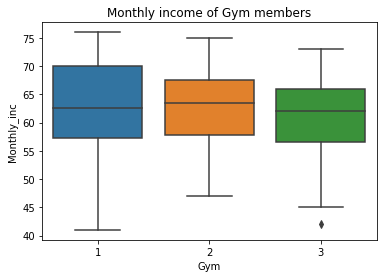

In [6]:
sns.boxplot(x = "Gym", y = "Monthly_inc", data = monthly_inc_df)
plt.title('Monthly income of Gym members')
plt.show()

#### The boxplots show almost similar shapes, location and spreads and group 3 has an low outlier.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 

### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate F, a test statistic

* scipy.stats.f.ppf gives the critical value at a given level of confidence with a pair of degrees of freedom.
* scipy.stats.f.cdf gives the cumulative distribution function for the given random variable - given the calculated F value at a given level of confidence with a pair of degrees of freedom. 

In [ ]:
import scipy.stats             as     stats

### Formulate an ANOVA table using statsmodels

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In the formula. we know that 
* 1)  ~ separates the left hand side of the model from the right hand side
* 2) + adds new columns to the design matrix
* 3) :  adds a new column to the design matrix with the product of the other two columns
* 4) * also adds the individual columns multiplied together along with their product
* 5) C() operator denotes that the variable enclosed in C() will be treated explicitly as categorical variable.

In [21]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Monthly_inc ~ Gym', data = monthly_inc_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq    df         F   PR(>F)
Gym         66.614123   2.0  0.497075  0.61079
Residual  4020.370004  60.0       NaN      NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, calculated value of F ( = 0.497075) is less than Critical value of F( = 3.15)

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that at least one mean monthly income of a gym is different from others .

# Two-way ANOVA

The following table shows the quantity of soaps at different discount at locations collected over 20 days.

In [22]:
table1  = [['Loc','Dis0','Dis10','Dis20'], [ 1, 20, 28, 32], [ 2, 20, 19, 20],
  [ 1, 16, 23, 29 ],[ 2, 21, 27, 31 ],[ 1, 24, 25, 28 ],[ 2, 23, 23, 35 ],
  [ 1, 20, 31, 27 ],[ 2, 19, 30, 25 ],[ 1, 19, 25, 30 ],[ 2, 25, 25, 31 ],
  [ 1, 10, 24, 26 ],[ 2, 22, 21, 31 ],[ 1, 24, 28, 37 ],[ 2, 25, 33, 31 ],
  [ 1, 16, 23, 33 ],[ 2, 21, 26, 23 ],[ 1, 25, 26, 27 ],[ 2, 26, 22, 22 ],
  [ 1, 16, 25, 31 ],[ 2, 22, 28, 32 ],[ 1, 18, 22, 37 ],[ 2, 25, 24, 22 ],
  [ 1, 20, 24, 28 ],[ 2, 23, 23, 29 ],[ 1, 17, 26, 25 ],[ 2, 23, 26, 25 ],
  [ 1, 26, 28, 23 ],[ 2, 24, 16, 34 ],[ 1, 16, 21, 26 ],[ 2, 20, 30, 30 ],
  [ 1, 21, 27, 33 ],[2, 23, 22, 25 ],[ 1, 24, 25, 28 ],[ 2, 18, 16, 39 ],
  [ 1, 19, 20, 30 ],[ 2, 19, 25, 32 ],[ 1, 19, 26, 30 ],[ 2, 19, 34, 29 ],
  [ 1, 21, 26, 26 ],[ 2, 30, 23, 22 ]]
headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

    Loc  Dis0  Dis10  Dis20
0     1    20     28     32
1     2    20     19     20
2     1    16     23     29
3     2    21     27     31
4     1    24     25     28
5     2    23     23     35
6     1    20     31     27
7     2    19     30     25
8     1    19     25     30
9     2    25     25     31
10    1    10     24     26
11    2    22     21     31
12    1    24     28     37
13    2    25     33     31
14    1    16     23     33
15    2    21     26     23
16    1    25     26     27
17    2    26     22     22
18    1    16     25     31
19    2    22     28     32
20    1    18     22     37
21    2    25     24     22
22    1    20     24     28
23    2    23     23     29
24    1    17     26     25
25    2    23     26     25
26    1    26     28     23
27    2    24     16     34
28    1    16     21     26
29    2    20     30     30
30    1    21     27     33
31    2    23     22     25
32    1    24     25     28
33    2    18     16     39
34    1    19     20

This is a two-way ANOVA with replication since the data contains values for multiple locations.

Conduct a two-way ANOVA at $\alpha$ = 5% to test the effects of discounts and location on sales.

In [23]:
d0_val  = df1['Dis0'].values
d10_val = df1['Dis10'].values
d20_val = df1['Dis20'].values
l_val   = df1['Loc'].values

df1   = pd.DataFrame({'Loc': l_val, 'Discount':'0','Qty': d0_val})
df2   = pd.DataFrame({'Loc': l_val, 'Discount':'10','Qty': d10_val})
df3   = pd.DataFrame({'Loc': l_val, 'Discount':'20','Qty': d20_val})

Sale_qty_df = pd.DataFrame()

Sale_qty_df = Sale_qty_df.append(df1) 
Sale_qty_df = Sale_qty_df.append(df2) 
Sale_qty_df = Sale_qty_df.append(df3) 

pd.DataFrame(Sale_qty_df)

,Loc,Discount,Qty
0,1,0,20
1,2,0,20
2,1,0,16
3,2,0,21
4,1,0,24
...,...,...,...
35,2,20,32
36,1,20,30
37,2,20,29
38,1,20,26


In [24]:
# 

### Step 1: State the null and alternative hypothesis:

The null hypotheses for each of the sets are given below. 

* 1) The population means of the first factor (Discount) are equal. 
* 2) The population means of the second factor (Location) are equal. 
* 3) There is no interaction between the two factors - Discount and Location.

Alternative Hypothesis:

* 1) The population means of the first factor (Discount) are not equal. 
* 2) The population means of the second factor (Location) are not equal. 
* 3) There is an interaction between the two factors - Discount and Location.

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

##### Here we have three groups and two factors. There are two independent variables, Discount and Location. 

##### Two-way ANOVA determines how a response (Sale Quantity) is affected by two factors, Discount and Location. 

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [10]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'Qty ~ C(Discount) + C(Loc) + C(Discount):C(Loc)'
model = ols(formula, Sale_qty_df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                         sum_sq     df          F        PR(>F)
C(Discount)         1240.316667    2.0  39.279968  1.055160e-13
C(Loc)                 7.008333    1.0   0.443898  5.065930e-01
C(Discount):C(Loc)    84.816667    2.0   2.686085  7.246036e-02
Residual            1799.850000  114.0        NaN           NaN


### Step 5:  Decide to reject or accept null hypothesis

## End